# Importing Libraries

In [4]:
# Install imbalanced-learn (if not already installed)
!pip install imbalanced-learn

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

# Reading the Dataset and dropping unecessary columns

In [5]:
# Load the dataset
data = pd.read_csv('/content/breast-cancer.csv')  # Update path as needed

# Step 1: Dropping unnecessary columns
data = data.drop(columns=['id'])

# Step 2: Encoding the target variable
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])  # Malignant = 1, Benign = 0

# Step 3: Splitting the dataset into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Step 4: Normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

In [6]:
# Step 5: Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Addressing class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# Model Building

In [7]:
# Step 7: Training and evaluating multiple models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Evaluate each model
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else "N/A"

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "ROC-AUC": roc_auc
    })

    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# Display results
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.

# Plotting Results Obtained

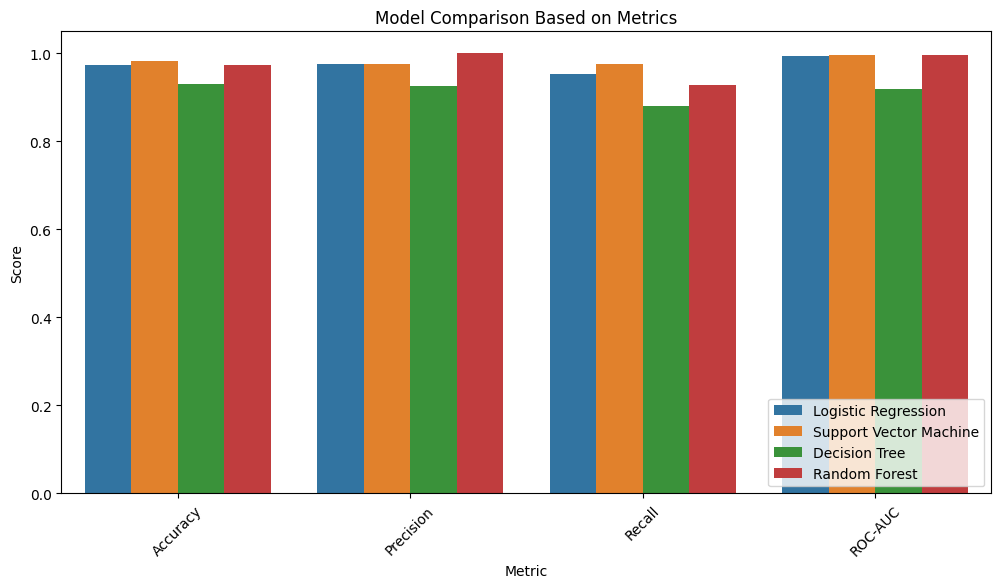

In [10]:
#Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve # Import the roc_curve function here

#comparison of metrics through barplot
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=results_melted)
plt.title("Model Comparison Based on Metrics")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

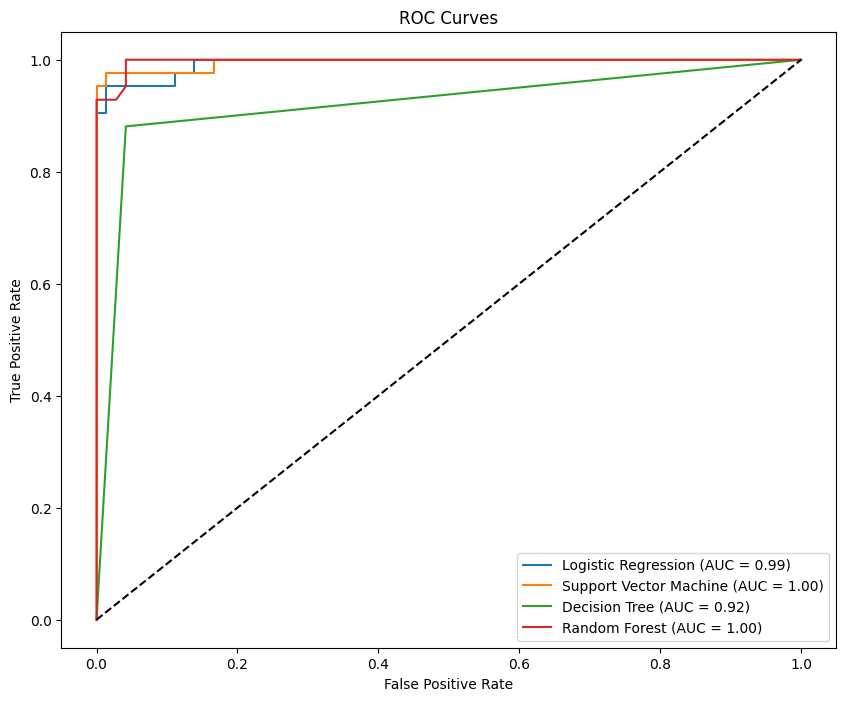

In [11]:
# Roc Curve
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

# Finding the Best Model

In [12]:
# Determine the best model based on average metric score
results_df['Average Score'] = results_df[['Accuracy', 'Precision', 'Recall', 'ROC-AUC']].mean(axis=1)
best_model = results_df.loc[results_df['Average Score'].idxmax()]
print(f"\nBest Model: {best_model['Model']} with Average Score: {best_model['Average Score']:.4f}")


Best Model: Support Vector Machine with Average Score: 0.9826
